<a href="https://colab.research.google.com/github/gustavoramos82/Dado-queimadas-Par-/blob/main/Estudo_queimadas_no_par%C3%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basedosdados

In [2]:
#Importando as blibiotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import basedosdados as bd
import requests

In [3]:
billing_id = '452689272970'

query = """
  SELECT
    dados.ano as ano,
    dados.mes as mes,
    dados.data_hora as data_hora,
    dados.bioma as bioma,
    dados.sigla_uf AS sigla_uf,
    diretorio_sigla_uf.nome AS sigla_uf_nome,
    dados.id_municipio AS id_municipio,
    diretorio_id_municipio.nome AS id_municipio_nome,
    dados.latitude as latitude,
    dados.longitude as longitude,
    dados.satelite as satelite,
    dados.dias_sem_chuva as dias_sem_chuva,
    dados.precipitacao as precipitacao,
    dados.risco_fogo as risco_fogo,
    dados.potencia_radiativa_fogo as potencia_radiativa_fogo
FROM `basedosdados.br_inpe_queimadas.microdados` AS dados
LEFT JOIN (SELECT DISTINCT sigla,nome  FROM `basedosdados.br_bd_diretorios_brasil.uf`) AS diretorio_sigla_uf
    ON dados.sigla_uf = diretorio_sigla_uf.sigla
LEFT JOIN (SELECT DISTINCT id_municipio,nome  FROM `basedosdados.br_bd_diretorios_brasil.municipio`) AS diretorio_id_municipio
    ON dados.id_municipio = diretorio_id_municipio.id_municipio
WHERE
    dados.sigla_uf = 'PA'
"""

queimadas_para = bd.read_sql(query = query, billing_project_id = billing_id)

Downloading: 100%|██████████|


In [4]:
queimadas_para.head()

,ano,mes,data_hora,bioma,sigla_uf,sigla_uf_nome,id_municipio,id_municipio_nome,latitude,longitude,satelite,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo
0,2018,1,2018-01-01 16:15:00,Amazônia,PA,Pará,1501956,Cachoeira do Piriá,-1.856,-46.574,None,NaN,NaN,NaN,NaN
1,2018,1,2018-01-01 16:15:00,Amazônia,PA,Pará,1501956,Cachoeira do Piriá,-1.856,-46.589,None,NaN,NaN,NaN,NaN
2,2018,1,2018-01-01 16:15:00,Amazônia,PA,Pará,1501956,Cachoeira do Piriá,-1.858,-46.593,None,NaN,NaN,NaN,NaN
3,2018,1,2018-01-01 16:15:00,Amazônia,PA,Pará,1502301,Capitão Poço,-1.665,-47.181,None,NaN,NaN,NaN,NaN
4,2018,1,2018-01-01 16:15:00,Amazônia,PA,Pará,1502301,Capitão Poço,-1.670,-47.187,None,NaN,NaN,NaN,NaN


In [5]:
queimadas_para.tail()

,ano,mes,data_hora,bioma,sigla_uf,sigla_uf_nome,id_municipio,id_municipio_nome,latitude,longitude,satelite,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo
3711769,2024,9,2024-09-30 23:25:32,Amazônia,PA,Pará,1506187,Rondon do Pará,-4.5799,-48.0349,GOES-16,5.0,1.50,0.91,57.9
3711770,2024,9,2024-09-30 23:35:29,Amazônia,PA,Pará,1508159,Uruará,-4.0129,-53.7776,GOES-16,2.0,2.06,0.59,56.6
3711771,2024,9,2024-09-30 23:35:32,Amazônia,PA,Pará,1506187,Rondon do Pará,-4.5986,-48.0123,GOES-16,5.0,1.46,0.90,57.2
3711772,2024,9,2024-09-30 23:55:19,Amazônia,PA,Pará,1501105,Bagre,-2.4047,-50.3295,GOES-16,11.0,0.10,0.89,165.7
3711773,2024,9,2024-09-30 23:55:19,Amazônia,PA,Pará,1501105,Bagre,-2.3863,-50.3299,GOES-16,11.0,0.10,0.89,109.6


In [6]:
queimadas_para = queimadas_para[queimadas_para['ano']<2025]

In [7]:
queimadas_para.drop(columns=['bioma','sigla_uf','sigla_uf_nome','id_municipio'],inplace=True)
queimadas_para.head()

,ano,mes,data_hora,id_municipio_nome,latitude,longitude,satelite,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo
0,2018,1,2018-01-01 16:15:00,Cachoeira do Piriá,-1.856,-46.574,None,NaN,NaN,NaN,NaN
1,2018,1,2018-01-01 16:15:00,Cachoeira do Piriá,-1.856,-46.589,None,NaN,NaN,NaN,NaN
2,2018,1,2018-01-01 16:15:00,Cachoeira do Piriá,-1.858,-46.593,None,NaN,NaN,NaN,NaN
3,2018,1,2018-01-01 16:15:00,Capitão Poço,-1.665,-47.181,None,NaN,NaN,NaN,NaN
4,2018,1,2018-01-01 16:15:00,Capitão Poço,-1.670,-47.187,None,NaN,NaN,NaN,NaN


In [8]:
queimadas_para = queimadas_para.sort_values(by='ano')

In [9]:
queimadas_para.head()

,ano,mes,data_hora,id_municipio_nome,latitude,longitude,satelite,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo
535267,2003,1,2003-01-02 16:51:00,Almeirim,-1.285,-53.526,None,NaN,NaN,NaN,NaN
535266,2003,1,2003-01-02 16:51:00,Acará,-1.613,-48.323,None,NaN,NaN,NaN,NaN
535265,2003,1,2003-01-02 16:51:00,Abaetetuba,-1.639,-48.768,None,NaN,NaN,NaN,NaN
535264,2003,1,2003-01-02 16:51:00,Abaetetuba,-1.876,-48.943,None,NaN,NaN,NaN,NaN
535263,2003,1,2003-01-02 16:50:00,Paragominas,-3.439,-47.351,None,NaN,NaN,NaN,NaN


In [10]:
queimadas_para = queimadas_para.reset_index(drop=True)
queimadas_para.head()

,ano,mes,data_hora,id_municipio_nome,latitude,longitude,satelite,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo
0,2003,1,2003-01-02 16:51:00,Almeirim,-1.285,-53.526,None,NaN,NaN,NaN,NaN
1,2003,1,2003-01-02 16:51:00,Acará,-1.613,-48.323,None,NaN,NaN,NaN,NaN
2,2003,1,2003-01-02 16:51:00,Abaetetuba,-1.639,-48.768,None,NaN,NaN,NaN,NaN
3,2003,1,2003-01-02 16:51:00,Abaetetuba,-1.876,-48.943,None,NaN,NaN,NaN,NaN
4,2003,1,2003-01-02 16:50:00,Paragominas,-3.439,-47.351,None,NaN,NaN,NaN,NaN


In [11]:
queimadas_para['ano'].value_counts().sort_index()

,count
ano,
2003,53040
2004,74214
2005,71477
2006,55840
2007,68491
2008,48449
2009,41664
2010,57196
2011,26563


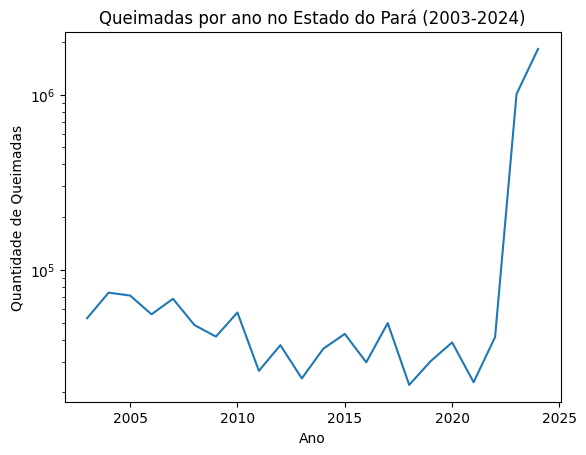

In [12]:
sns.lineplot(x=queimadas_para['ano'].value_counts().index,y=queimadas_para['ano'].value_counts().values)
plt.yscale('log')
plt.title('Queimadas por ano no Estado do Pará (2003-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Queimadas')
plt.show()

In [13]:
url = 'https://servicodados.ibge.gov.br/api/v1/localidades/municipios/Ananindeua'
response = requests.get(url)
data = response.json()
print(data)

{'id': 1500800, 'nome': 'Ananindeua', 'microrregiao': {'id': 15007, 'nome': 'Belém', 'mesorregiao': {'id': 1503, 'nome': 'Metropolitana de Belém', 'UF': {'id': 15, 'sigla': 'PA', 'nome': 'Pará', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}}, 'regiao-imediata': {'id': 150001, 'nome': 'Belém', 'regiao-intermediaria': {'id': 1501, 'nome': 'Belém', 'UF': {'id': 15, 'sigla': 'PA', 'nome': 'Pará', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}}}


In [14]:
municipios = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')
municipios.drop(columns=['latitude','longitude','capital','fuso_horario'],inplace=True)
municipios.head()

,codigo_ibge,nome,codigo_uf,siafi_id,ddd
0,5200050,Abadia de Goiás,52,1050,62
1,3100104,Abadia dos Dourados,31,4001,34
2,5200100,Abadiânia,52,9201,62
3,3100203,Abaeté,31,4003,37
4,1500107,Abaetetuba,15,401,91


In [15]:
municipios = municipios[municipios['ddd']==91]
municipios.head()

,codigo_ibge,nome,codigo_uf,siafi_id,ddd
4,1500107,Abaetetuba,15,401,91
18,1500206,Acará,15,403,91
40,1500305,Afuá,15,405,91
213,1500701,Anajás,15,413,91
218,1500800,Ananindeua,15,415,91


In [20]:
lista_mesoregiao = []
for i in list(municipios['codigo_ibge']):
  url = f'https://servicodados.ibge.gov.br/api/v1/localidades/municipios/{i}'
  response = requests.get(url)
  data = response.json()
  mesoregiao = data['microrregiao']['mesorregiao']['nome']
  lista_mesoregiao.append(mesoregiao)


In [21]:
municipios['mesorregiao'] = lista_mesoregiao
municipios.head()

,codigo_ibge,nome,codigo_uf,siafi_id,ddd,cidades_sem_acento,mesorregiao
4,1500107,Abaetetuba,15,401,91,Abaetetuba,Nordeste Paraense
18,1500206,Acará,15,403,91,Acara,Nordeste Paraense
40,1500305,Afuá,15,405,91,Afua,Marajó
213,1500701,Anajás,15,413,91,Anajas,Marajó
218,1500800,Ananindeua,15,415,91,Ananindeua,Metropolitana de Belém


In [23]:
municipios = municipios[['nome','mesorregiao']]
municipios.head()

,nome,mesorregiao
4,Abaetetuba,Nordeste Paraense
18,Acará,Nordeste Paraense
40,Afuá,Marajó
213,Anajás,Marajó
218,Ananindeua,Metropolitana de Belém


In [24]:
queimadas_para.rename(columns={'id_municipio_nome':'nome'},inplace=True)
queimadas_para = queimadas_para.merge(municipios,on='nome')
queimadas_para.head()

,ano,mes,data_hora,nome,latitude,longitude,satelite,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo,mesorregiao
0,2003,1,2003-01-02 16:51:00,Acará,-1.613,-48.323,None,NaN,NaN,NaN,NaN,Nordeste Paraense
1,2003,1,2003-01-02 16:51:00,Abaetetuba,-1.639,-48.768,None,NaN,NaN,NaN,NaN,Nordeste Paraense
2,2003,1,2003-01-02 16:51:00,Abaetetuba,-1.876,-48.943,None,NaN,NaN,NaN,NaN,Nordeste Paraense
3,2003,1,2003-01-02 16:50:00,Paragominas,-3.439,-47.351,None,NaN,NaN,NaN,NaN,Sudeste Paraense
4,2003,1,2003-01-02 16:50:00,Paragominas,-3.315,-46.927,None,NaN,NaN,NaN,NaN,Sudeste Paraense


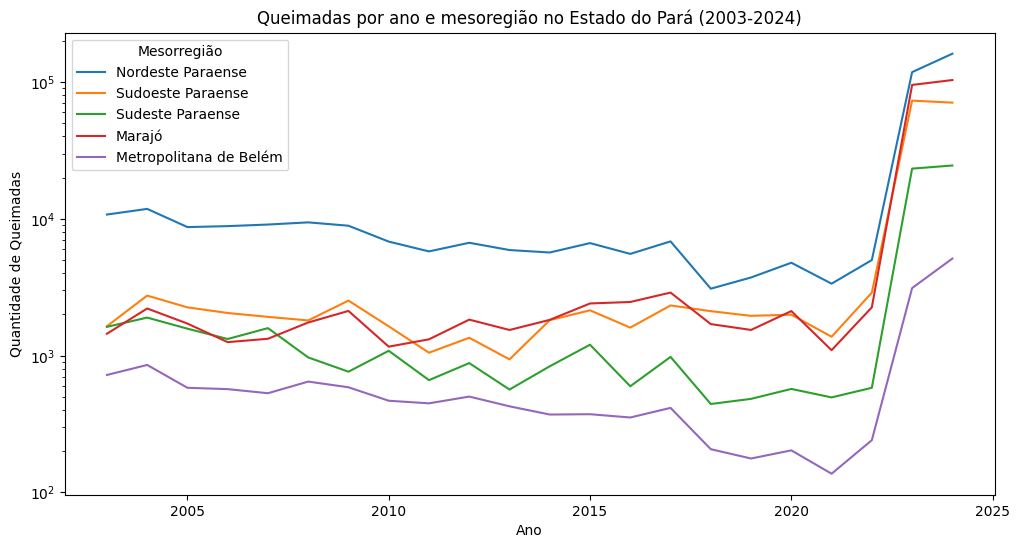

In [49]:
plt.figure(figsize=(12,6))
sns.lineplot(x='ano',y='count',data=queimadas_para[['ano','mesorregiao']].value_counts().reset_index().sort_values(by='ano'),
             hue='mesorregiao')
plt.title('Queimadas por ano e mesoregião no Estado do Pará (2003-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Queimadas')
plt.yscale('log')
plt.legend(title='Mesorregião')
plt.show()


In [56]:
queimadas_para[['nome','mesorregiao']].value_counts().reset_index()[0:10]


,nome,mesorregiao,count
0,Portel,Marajó,143461
1,Pacajá,Sudoeste Paraense,95693
2,Moju,Nordeste Paraense,76405
3,Anapu,Sudoeste Paraense,48763
4,Paragominas,Sudeste Paraense,41786
5,Senador José Porfírio,Sudoeste Paraense,37489
6,Tailândia,Nordeste Paraense,34976
7,Acará,Nordeste Paraense,33478
8,Tomé-Açu,Nordeste Paraense,27938
9,Ipixuna do Pará,Nordeste Paraense,27381


In [65]:
queimadas_para['horario'] = queimadas_para['data_hora'].dt.hour
queimadas_para.head()

,ano,mes,data_hora,nome,latitude,longitude,satelite,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo,mesorregiao,horario
0,2003,1,2003-01-02 16:51:00,Acará,-1.613,-48.323,None,NaN,NaN,NaN,NaN,Nordeste Paraense,16
1,2003,1,2003-01-02 16:51:00,Abaetetuba,-1.639,-48.768,None,NaN,NaN,NaN,NaN,Nordeste Paraense,16
2,2003,1,2003-01-02 16:51:00,Abaetetuba,-1.876,-48.943,None,NaN,NaN,NaN,NaN,Nordeste Paraense,16
3,2003,1,2003-01-02 16:50:00,Paragominas,-3.439,-47.351,None,NaN,NaN,NaN,NaN,Sudeste Paraense,16
4,2003,1,2003-01-02 16:50:00,Paragominas,-3.315,-46.927,None,NaN,NaN,NaN,NaN,Sudeste Paraense,16


In [68]:
conditions = [
    (queimadas_para['horario'] >= 6) & (queimadas_para['horario'] < 12),
    (queimadas_para['horario'] >= 12) & (queimadas_para['horario']< 18),
    (queimadas_para['horario'] >= 18) | (queimadas_para['horario'] < 6)
]
choices = ['manhã', 'tarde', 'noite']
queimadas_para['periodo'] = np.select(conditions, choices, default=None)

In [69]:
queimadas_para.head()

,ano,mes,data_hora,nome,latitude,longitude,satelite,dias_sem_chuva,precipitacao,risco_fogo,potencia_radiativa_fogo,mesorregiao,horario,periodo
0,2003,1,2003-01-02 16:51:00,Acará,-1.613,-48.323,None,NaN,NaN,NaN,NaN,Nordeste Paraense,16,tarde
1,2003,1,2003-01-02 16:51:00,Abaetetuba,-1.639,-48.768,None,NaN,NaN,NaN,NaN,Nordeste Paraense,16,tarde
2,2003,1,2003-01-02 16:51:00,Abaetetuba,-1.876,-48.943,None,NaN,NaN,NaN,NaN,Nordeste Paraense,16,tarde
3,2003,1,2003-01-02 16:50:00,Paragominas,-3.439,-47.351,None,NaN,NaN,NaN,NaN,Sudeste Paraense,16,tarde
4,2003,1,2003-01-02 16:50:00,Paragominas,-3.315,-46.927,None,NaN,NaN,NaN,NaN,Sudeste Paraense,16,tarde


Text(0.5, 1.0, 'Queimadas por período do dia no Estado do Pará (2003-2024)')

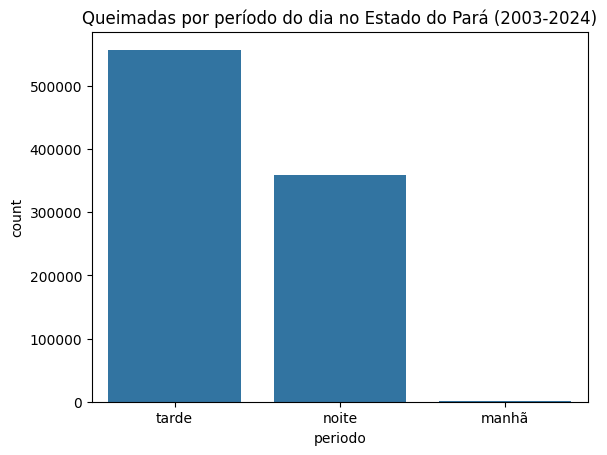

In [70]:
sns.countplot(x='periodo',data=queimadas_para)
plt.title('Queimadas por período do dia no Estado do Pará (2003-2024)')

<Axes: xlabel='horario', ylabel='Count'>

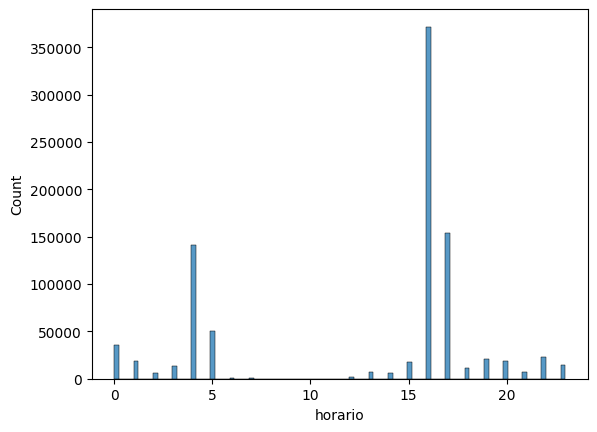

In [75]:
sns.histplot(x='horario',data=queimadas_para)